In [1]:
import zipfile
import os
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers
import numpy as np

In [2]:
train_images = []
train_labels = []
shape = (200,200)
train_path = '../input/fruit-images-for-object-detection/train_zip/train'
for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        img = cv2.resize(img,shape)
        train_images.append(img)
        train_labels.append(filename.split('_')[0])
        
train_labels = pd.get_dummies(train_labels).values

train_images = np.array(train_images)
train_images = train_images/255

x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

[0 1 0 0]


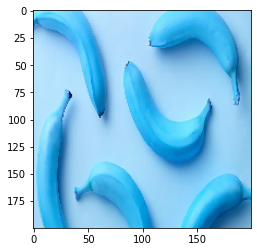

In [3]:
plt.imshow(train_images[0])

print(train_labels[0])

[1 0 0 0]


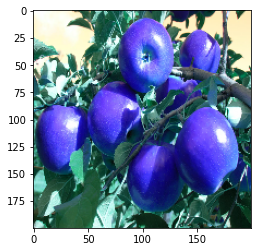

In [4]:
plt.imshow(train_images[1])
print(train_labels[1])

[0 0 0 1]


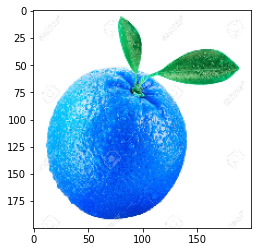

In [5]:
plt.imshow(train_images[2])
print(train_labels[2])

[0 0 1 0]


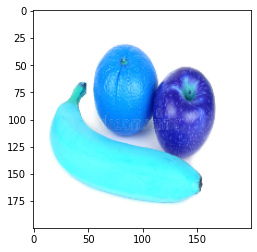

In [6]:
plt.imshow(train_images[3])
print(train_labels[3])

In [7]:
test_images = []
test_labels = []
shape = (200,200)
test_path = '../input/fruit-images-for-object-detection/test_zip/test'

for filename in os.listdir('../input/fruit-images-for-object-detection/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
       
        test_labels.append(filename.split('_')[0])
        
        
        img = cv2.resize(img,shape)
        
        test_images.append(img)
test_images = np.array(test_images)
test_labels = pd.get_dummies(test_labels).values

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (200,200,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))

model.compile(
loss = 'categorical_crossentropy',
metrics = ['acc'],
optimizer='adam')

2022-11-20 10:57:06.681891: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               18874496  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size =  45, validation_data = (x_val,y_val))

2022-11-20 10:57:07.168635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
4/4 [==============================] - 5s 981ms/step - loss: 17.1797 - acc: 0.3389 - val_loss: 17.7146 - val_acc: 0.3333
Epoch 2/30
4/4 [==============================] - 3s 870ms/step - loss: 6.7680 - acc: 0.3056 - val_loss: 1.4335 - val_acc: 0.3000
Epoch 3/30
4/4 [==============================] - 3s 888ms/step - loss: 1.2777 - acc: 0.3611 - val_loss: 0.9869 - val_acc: 0.5333
Epoch 4/30
4/4 [==============================] - 3s 870ms/step - loss: 1.0117 - acc: 0.6500 - val_loss: 0.9653 - val_acc: 0.6000
Epoch 5/30
4/4 [==============================] - 4s 1s/step - loss: 0.7244 - acc: 0.6500 - val_loss: 0.7358 - val_acc: 0.7667
Epoch 6/30
4/4 [==============================] - 3s 883ms/step - loss: 0.4439 - acc: 0.8667 - val_loss: 0.5602 - val_acc: 0.8667
Epoch 7/30
4/4 [==============================] - 3s 865ms/step - loss: 0.2653 - acc: 0.9278 - val_loss: 0.6908 - val_acc: 0.8167
Epoch 8/30
4/4 [==============================] - 3s 882ms/step - loss: 0.1738 - acc: 0.950

In [11]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 0s 116ms/step - loss: 0.7893 - acc: 0.9333
[0.7893113493919373, 0.9333333373069763]


In [12]:
score, accuracy = model.evaluate(test_images, test_labels)

2/2 [==============================] - 0s 120ms/step - loss: 215.3555 - acc: 0.8833
